In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Data path for train and test
train_identity_path = '/content/drive/MyDrive/Cozii/ieee-fraud-detection/train_identity.csv'
train_transaction_path = '/content/drive/MyDrive/Cozii/ieee-fraud-detection/train_transaction.csv'
test_identity_path = '/content/drive/MyDrive/Cozii/ieee-fraud-detection/test_identity.csv'
test_transaction_path = '/content/drive/MyDrive/Cozii/ieee-fraud-detection/test_transaction.csv'

In [6]:
# Load data
df_train_identity = pd.read_csv(train_identity_path)
df_train_transaction = pd.read_csv(train_transaction_path)
df_test_identity = pd.read_csv(test_identity_path)
df_test_transaction = pd.read_csv(test_transaction_path)

#1.0 Data

**1.1 Summary Data Frames**

In [7]:
df_train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [8]:
df_train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df_test_identity.head()

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [10]:
df_test_transaction.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**1.2 Check Data shape**

In [16]:
print("Shape of train identity    :", df_train_identity.shape)
print("Shape of train transaction :", df_train_transaction.shape)
print("Shape of test  identity    :", df_test_identity.shape)
print("Shape of test  transaction :", df_test_transaction.shape)

Shape of train identity    : (144233, 41)
Shape of train transaction : (590540, 394)
Shape of test  identity    : (141907, 41)
Shape of test  transaction : (506691, 393)


Analysis:

Train Set:

Identity data: 144,233 samples, 41 features.
Transaction data: 590,540 samples, 394 features.

Test Set:

Identity data: 141,907 samples, 41 features.
Transaction data: 506,691 samples, 393 features.

Key Observations:

The number of samples in identity data is significantly smaller than in transaction data.
Identity and transaction data must be linked by an ID (TransactionID) for analysis.
Train and test identity data sizes are similar, suggesting a comparable distribution.
Train and Test transaction data have different feature counts (394 vs. 393). This might indicate: isFraud att only in the Train transaction


**1.3 Data info**

In [18]:
# Display basic info
print("Train Identity Info:")
print(df_train_identity.info(), "\n")
print("Train Transaction Info:")
print(df_train_transaction.info(), "\n")

Train Identity Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17   

In [19]:
print("Test Identity Info:")
print(df_test_identity.info(), "\n")
print("Test Transaction Info:")
print(df_test_transaction.info(), "\n")

Test Identity Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141907 entries, 0 to 141906
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  141907 non-null  int64  
 1   id-01          141907 non-null  float64
 2   id-02          136976 non-null  float64
 3   id-03          66481 non-null   float64
 4   id-04          66481 non-null   float64
 5   id-05          134750 non-null  float64
 6   id-06          134750 non-null  float64
 7   id-07          5059 non-null    float64
 8   id-08          5059 non-null    float64
 9   id-09          74338 non-null   float64
 10  id-10          74338 non-null   float64
 11  id-11          136778 non-null  float64
 12  id-12          141907 non-null  object 
 13  id-13          130286 non-null  float64
 14  id-14          71357 non-null   float64
 15  id-15          136977 non-null  object 
 16  id-16          125747 non-null  object 
 17  id-17    

**1.4 Checking missing values**

In [32]:
# Visualize missing data pattern
import missingno as msno

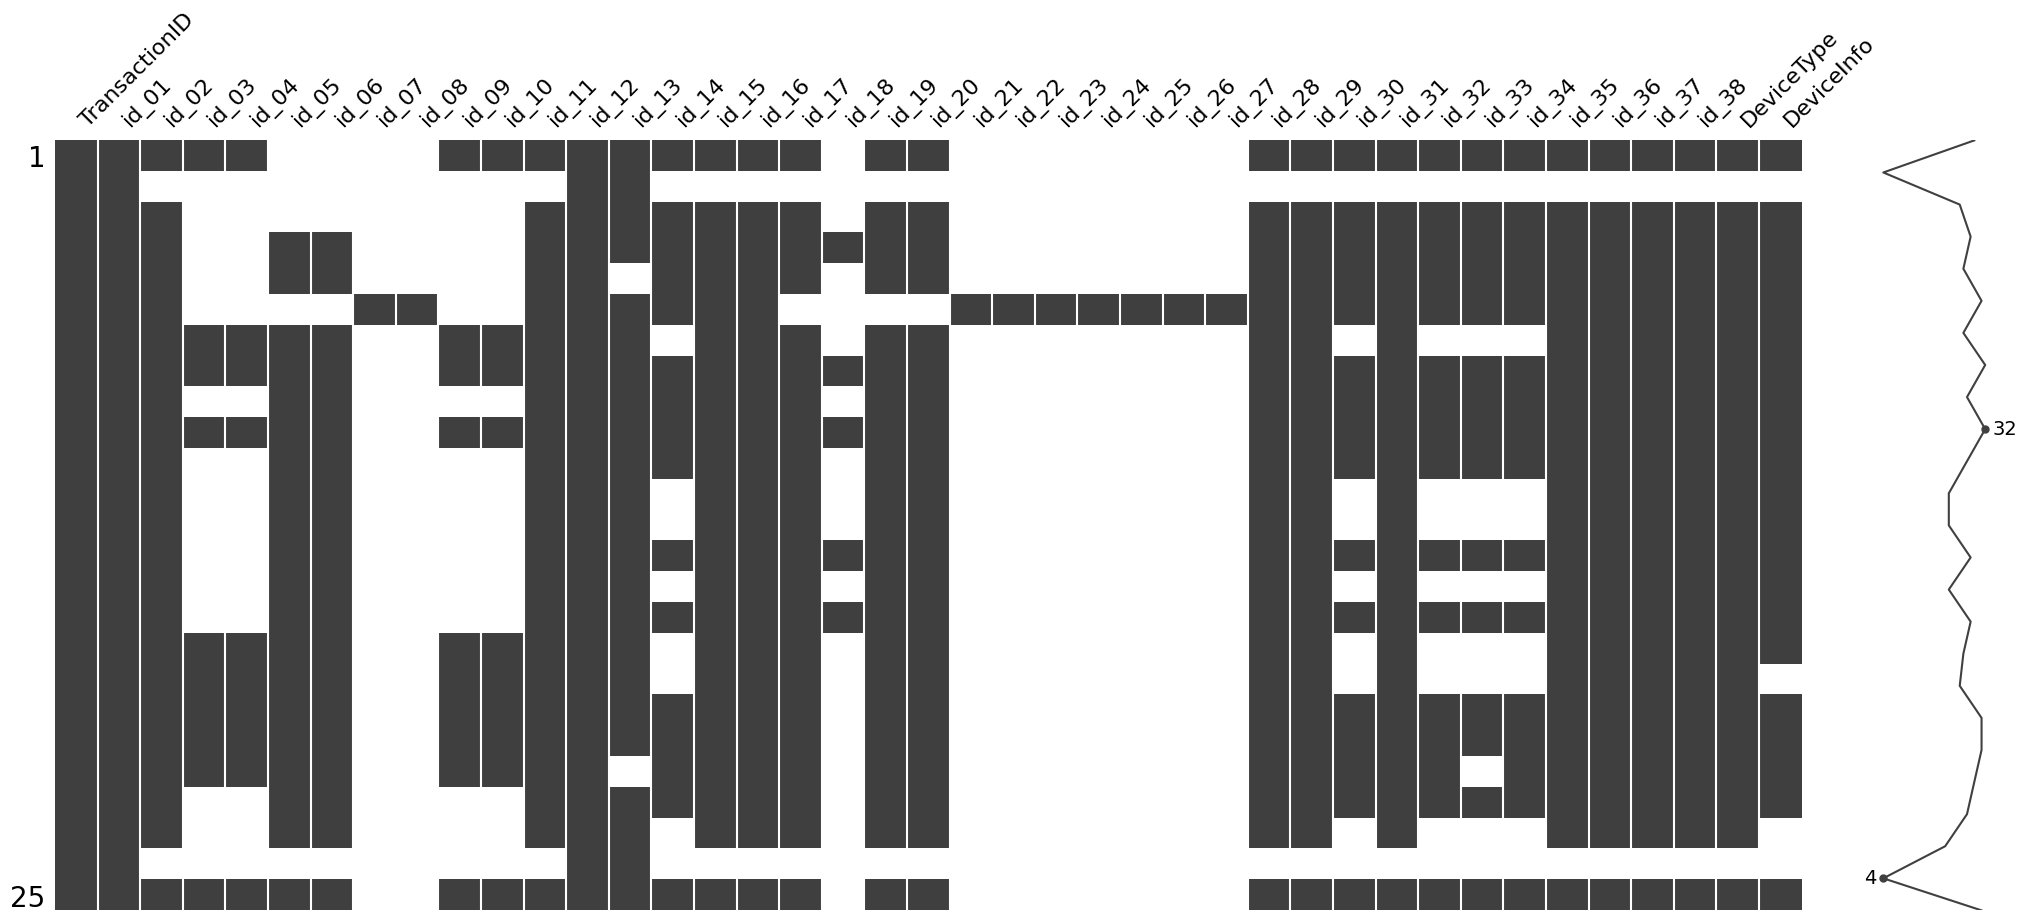

In [31]:
msno.matrix(df_train_identity.sample(25))
plt.show()

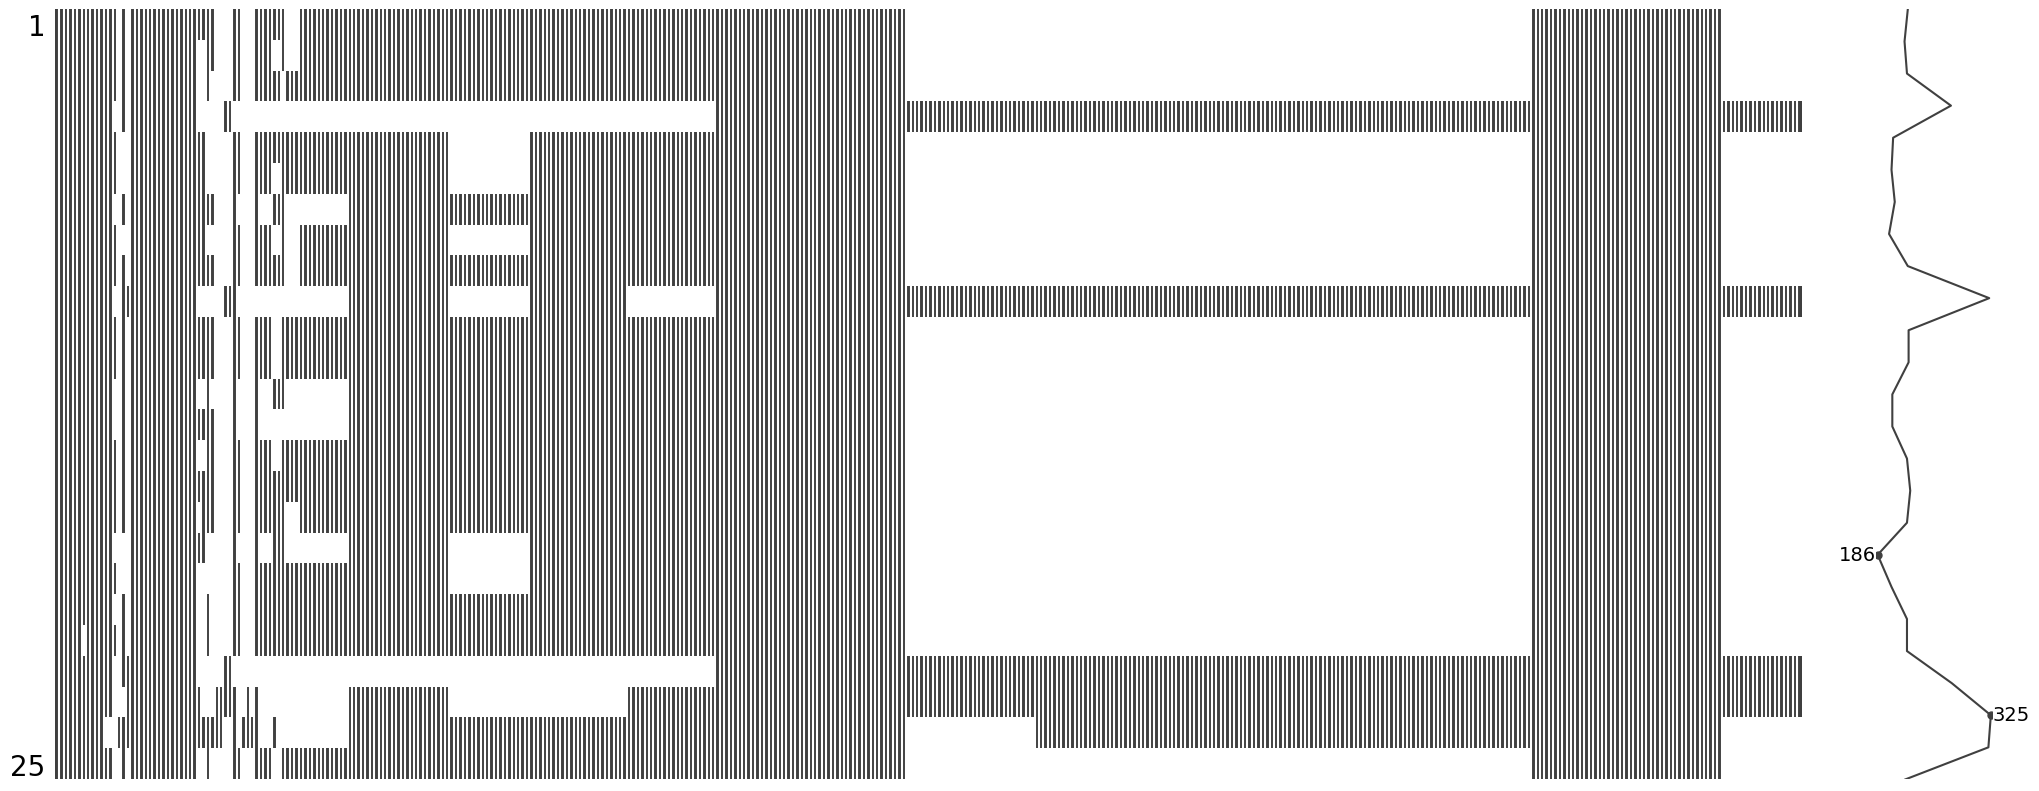

In [33]:
msno.matrix(df_train_transaction.sample(25))
plt.show()

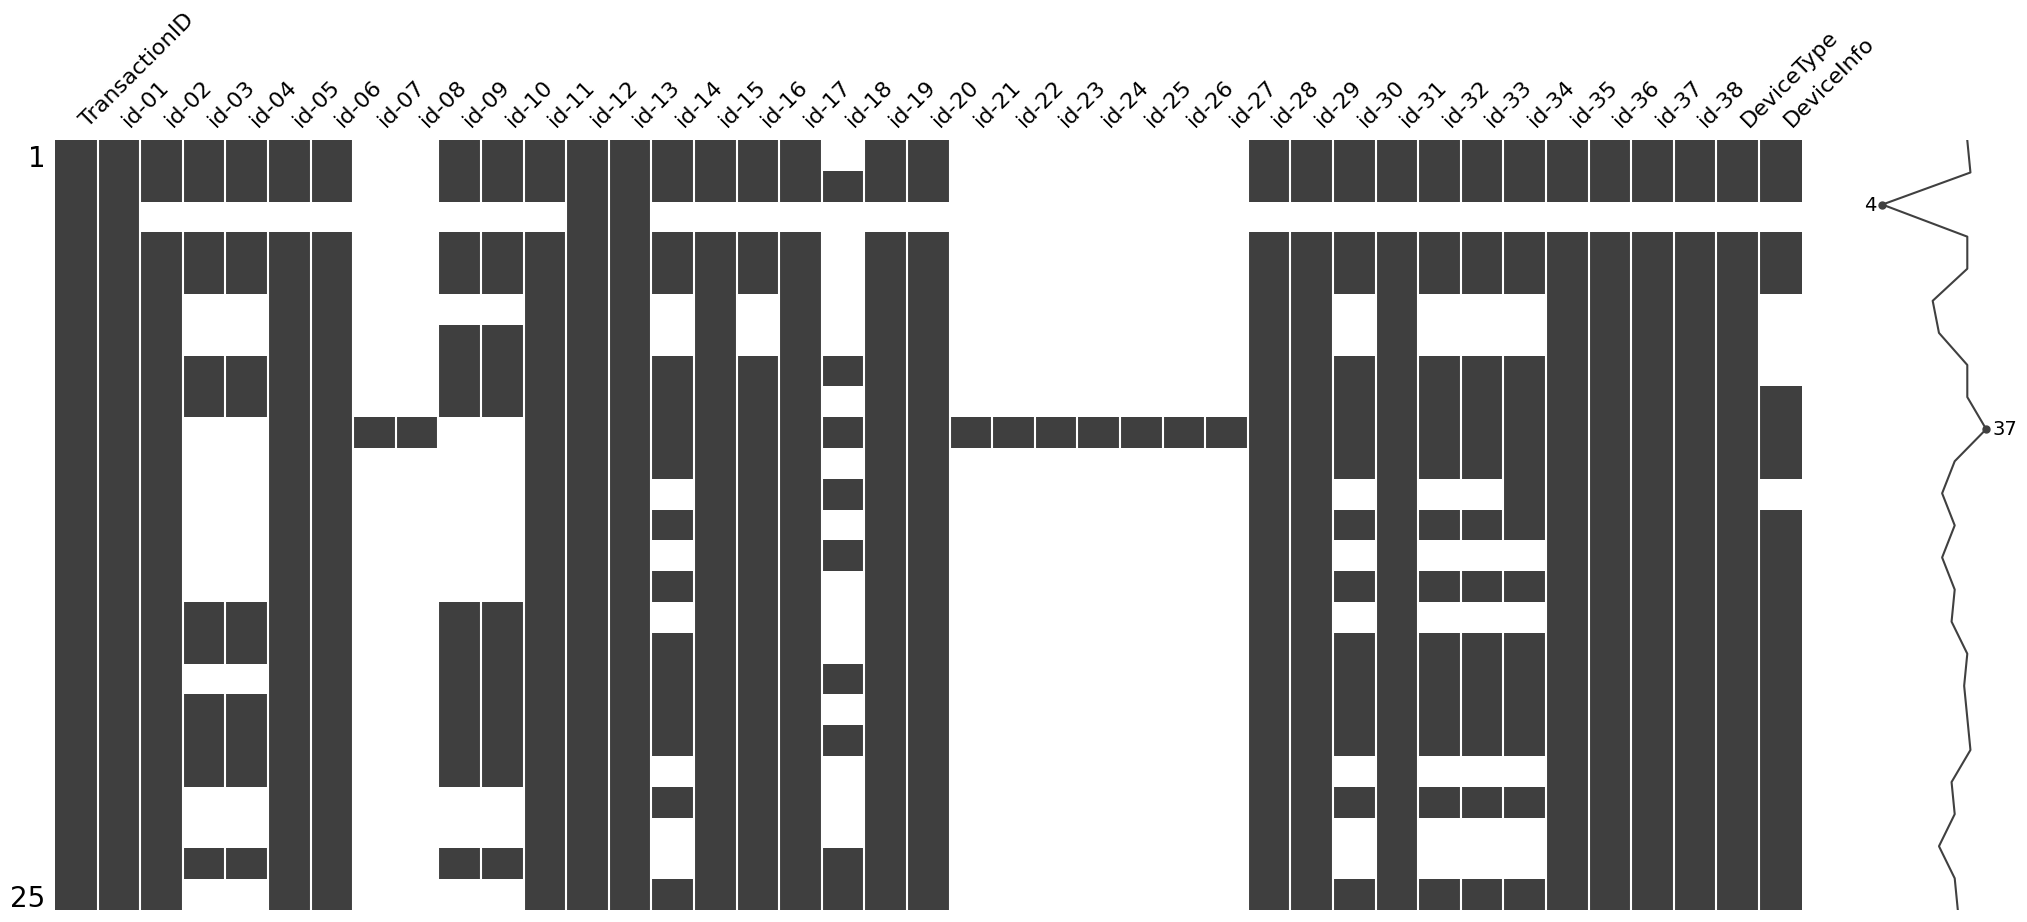

In [34]:
msno.matrix(df_test_identity.sample(25))
plt.show()

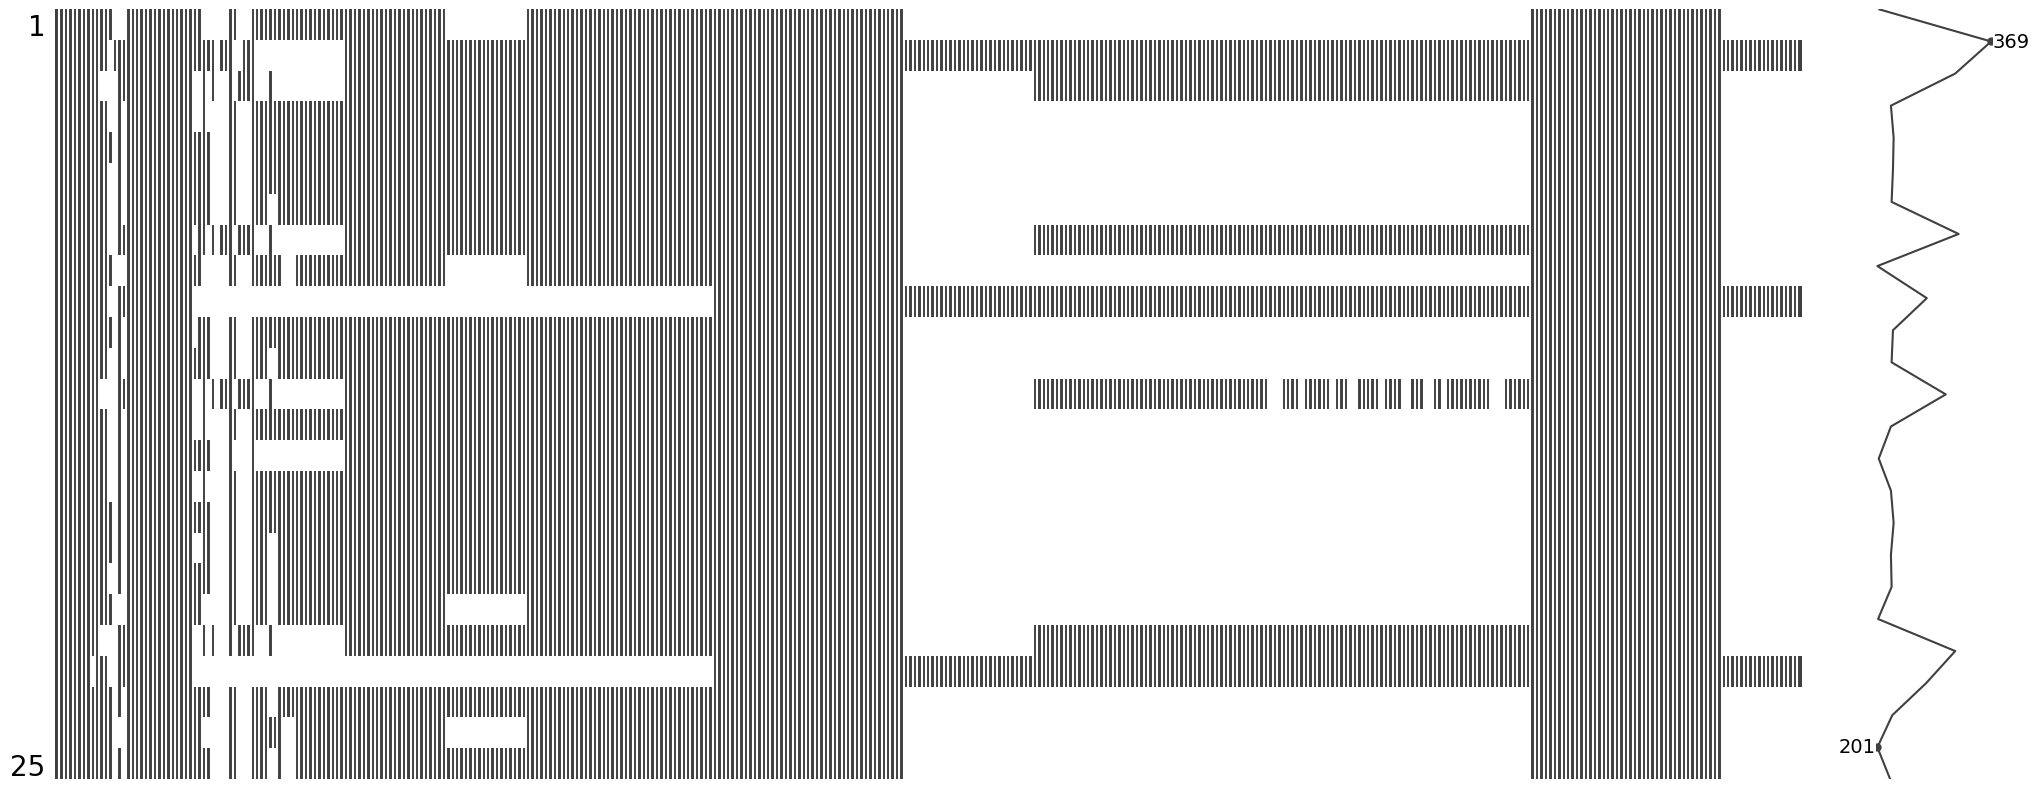

In [35]:
msno.matrix(df_test_transaction.sample(25))
plt.show()

Observation:
1.   Some columns are almost entirely missing, meaning they may not be useful for modeling.
2.   There are certain features with patchy missing values, which might require targeted imputation.

3. The right-side plot suggests that some rows are highly incomplete, meaning you may consider removing them if they lack too much data.

**1.5 Data distribution**

In [39]:
# Summary statistics
print(df_train_transaction.describe())
print(df_train_identity.describe())

       TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25%      6019.000000    

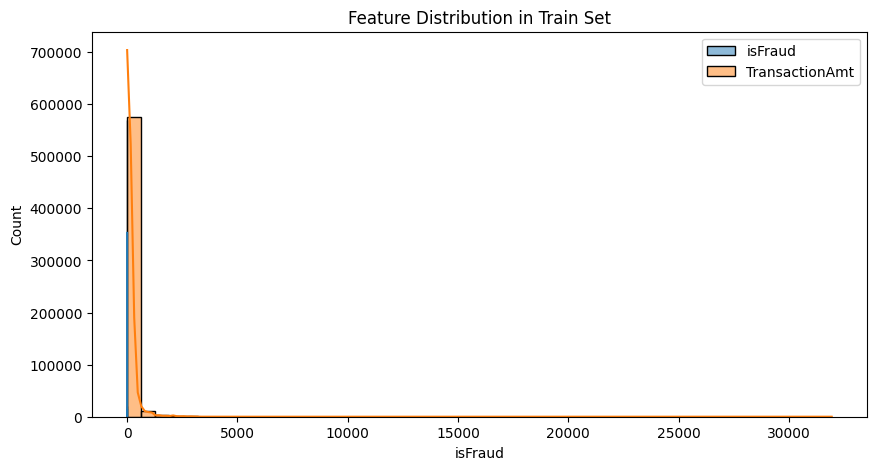

In [40]:
# Plot distribution of a few numerical features
plt.figure(figsize=(10, 5))

for col in ["isFraud", "TransactionAmt"]:  # check 2 features
    sns.histplot(df_train_transaction[col].dropna(), bins=50, kde=True, label=col)
plt.legend()
plt.title("Feature Distribution in Train Set")
plt.show()

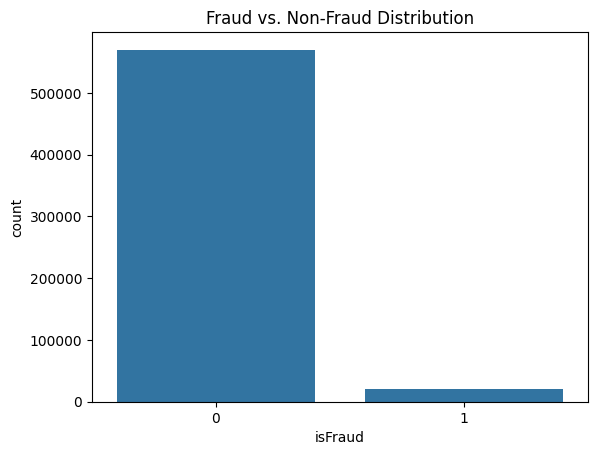

In [42]:
sns.countplot(x=df_train_transaction['isFraud'])
plt.title("Fraud vs. Non-Fraud Distribution")
plt.show()

Observation: Highly Imbalanced Data: the majority of transactions are non-fraudulent (isFraud = 0), and only a small fraction of transactions are fraudulent (isFraud = 1). Fraud cases is significantly lower than non-fraud cases

**1.6 Data correlation analysis**

In [48]:
# Convert columns with 'object' dtype to numeric if possible
for col in df_train_identity.select_dtypes(include=['object']).columns:
    try:
        # Attempt to convert the column to numeric
        df_train_identity[col] = pd.to_numeric(df_train_identity[col], errors='raise')
    except ValueError:
        # If conversion fails, handle the non-numeric values (e.g., replace with NaN or mode)
        # For this example, we'll replace non-numeric values with NaN
        df_train_identity[col] = pd.to_numeric(df_train_identity[col], errors='coerce')
        print(f"Column '{col}' contains non-numeric values. Replacing with NaN.")

#compute the correlation matrix
corr_matrix_identity = df_train_identity.corr()

Column 'id_12' contains non-numeric values. Replacing with NaN.
Column 'id_15' contains non-numeric values. Replacing with NaN.
Column 'id_16' contains non-numeric values. Replacing with NaN.
Column 'id_23' contains non-numeric values. Replacing with NaN.
Column 'id_27' contains non-numeric values. Replacing with NaN.
Column 'id_28' contains non-numeric values. Replacing with NaN.
Column 'id_29' contains non-numeric values. Replacing with NaN.
Column 'id_30' contains non-numeric values. Replacing with NaN.
Column 'id_31' contains non-numeric values. Replacing with NaN.
Column 'id_33' contains non-numeric values. Replacing with NaN.
Column 'id_34' contains non-numeric values. Replacing with NaN.
Column 'id_35' contains non-numeric values. Replacing with NaN.
Column 'id_36' contains non-numeric values. Replacing with NaN.
Column 'id_37' contains non-numeric values. Replacing with NaN.
Column 'id_38' contains non-numeric values. Replacing with NaN.
Column 'DeviceType' contains non-numeric

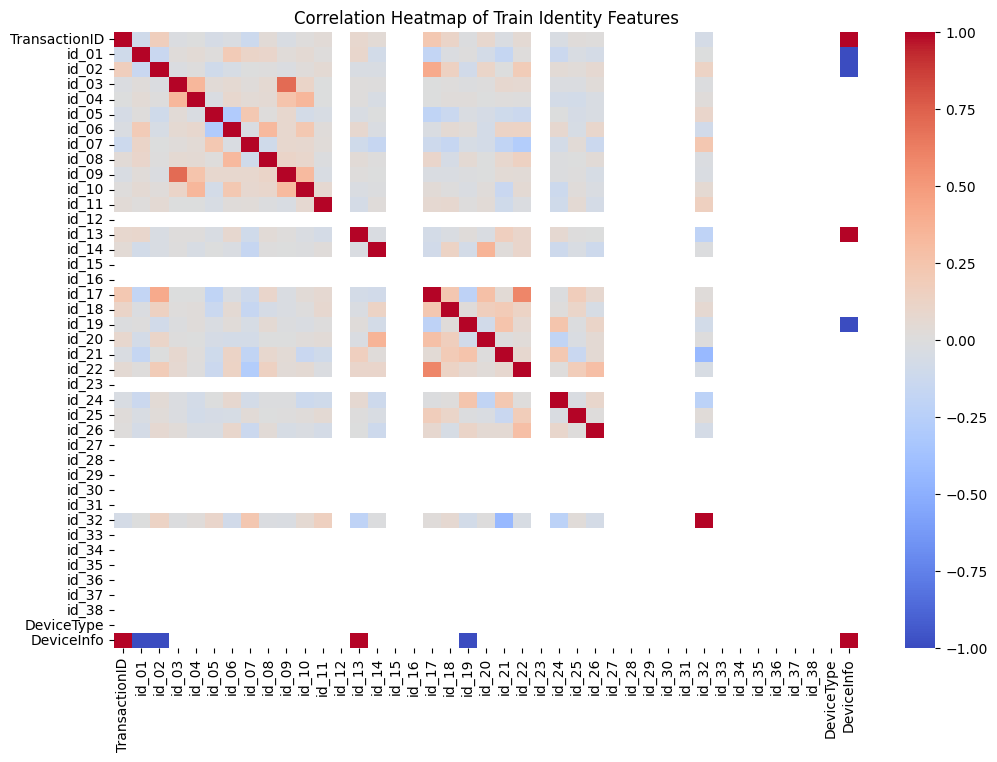

In [49]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_identity, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Train Identity Features")
plt.show()

In [44]:
# Convert columns with 'object' dtype to numeric if possible
for col in df_train_transaction.select_dtypes(include=['object']).columns:
    try:
        # Attempt to convert the column to numeric
        df_train_transaction[col] = pd.to_numeric(df_train_transaction[col], errors='raise')
    except ValueError:
        # If conversion fails, handle the non-numeric values (e.g., replace with NaN or mode)
        # For this example, we'll replace non-numeric values with NaN
        df_train_transaction[col] = pd.to_numeric(df_train_transaction[col], errors='coerce')
        print(f"Column '{col}' contains non-numeric values. Replacing with NaN.")

#compute the correlation matrix
corr_matrix = df_train_transaction.corr()

Column 'ProductCD' contains non-numeric values. Replacing with NaN.
Column 'card4' contains non-numeric values. Replacing with NaN.
Column 'card6' contains non-numeric values. Replacing with NaN.
Column 'P_emaildomain' contains non-numeric values. Replacing with NaN.
Column 'R_emaildomain' contains non-numeric values. Replacing with NaN.
Column 'M1' contains non-numeric values. Replacing with NaN.
Column 'M2' contains non-numeric values. Replacing with NaN.
Column 'M3' contains non-numeric values. Replacing with NaN.
Column 'M4' contains non-numeric values. Replacing with NaN.
Column 'M5' contains non-numeric values. Replacing with NaN.
Column 'M6' contains non-numeric values. Replacing with NaN.
Column 'M7' contains non-numeric values. Replacing with NaN.
Column 'M8' contains non-numeric values. Replacing with NaN.
Column 'M9' contains non-numeric values. Replacing with NaN.


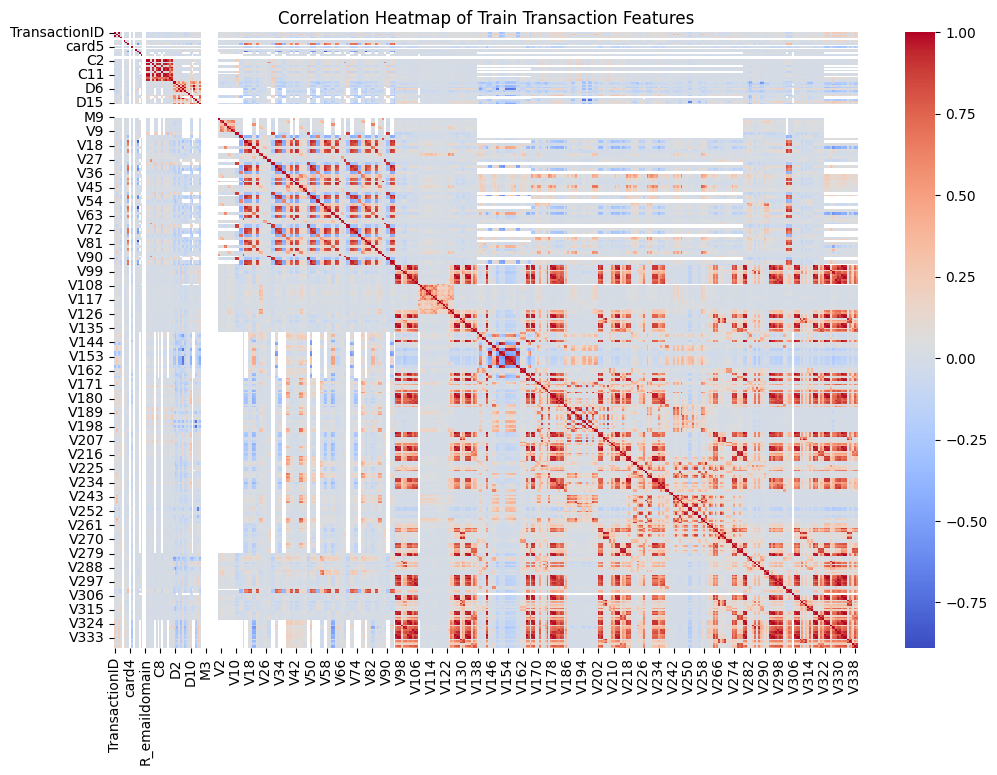

In [45]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Train Transaction Features")
plt.show()

The heatmap shows we can remove some features.

**1.6 Other data visualizations**

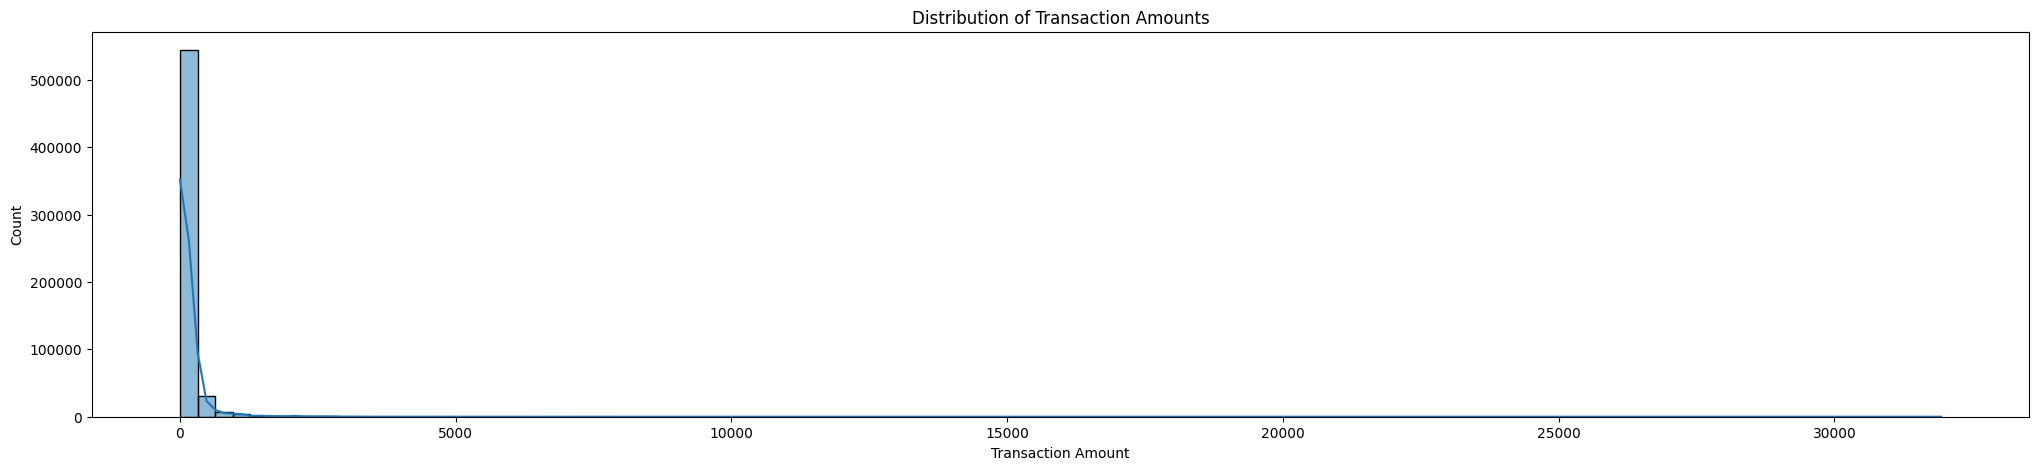

In [52]:
#Distribution of Transaction Amounts
plt.figure(figsize=(25, 5))
sns.histplot(df_train_transaction['TransactionAmt'], bins=100, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.show()

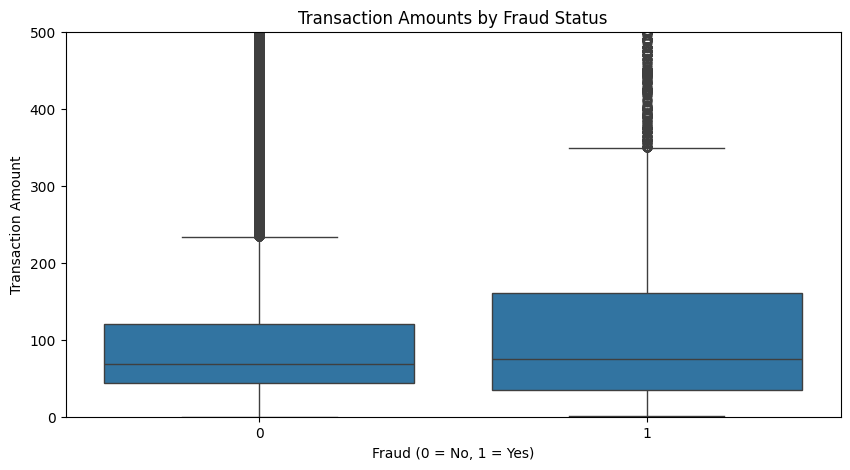

In [53]:
#Transaction Amounts by Fraud Status
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_train_transaction['isFraud'], y=df_train_transaction['TransactionAmt'])
plt.title("Transaction Amounts by Fraud Status")
plt.xlabel("Fraud (0 = No, 1 = Yes)")
plt.ylabel("Transaction Amount")
plt.ylim(0, 500)  # Adjust to remove extreme outliers
plt.show()